In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import datetime as dt
from dateutil.relativedelta import relativedelta
import quandl

import constants
from utils import cached_quandl_get, get_quandl_code, compare_areas

In [2]:
# Plotting setup
style.use('seaborn-poster')
style.use('fivethirtyeight')

# Quandl setup
quandl.ApiConfig.api_key = constants.QUANDL_API_KEY

In [122]:
#DATES
start_date = dt.date(2005, 1, 1)
end_date = dt.date(2019, 4, 1)

#METRO AREAS
metros = {
    'Austin, TX': 31, 
    'Seattle, WA': 15, 
    'Los Angeles-Long Beach-Anaheim, CA': 436, #'Los Angeles, CA': 915,
    'San Francisco, CA': 11,
    'New York, NY': 2,
}

# greater_metros = {
#     'Austin-Round Rock, TX': 1133,
#     'Seattle-Tacoma-Bellevue, WA': 1118,
#     'New York-Newark-Jersey City, NY': 1105,
#     'Los Angeles-Long Beach-Anaheim, CA': 436,
#     'San Francisco-Oakland-Hayward, CA': 1114
# }

In [123]:
#utilities
def normalize(df):
    norm_df = df.copy()
    for col in norm_df:
        start_index = norm_df[col].first_valid_index()
        norm_df[col] = norm_df[col]/norm_df[col][start_index]
    return norm_df

In [124]:
%%markdown
# Median Single Family Home Value

# Median Single Family Home Value


In [125]:
ZILLOW_HOME_VALUE_IDX_SINGLE_FAMILY = 'ZHVISF'
ZILLOW_HOME_VALUE_IDX_BOTTOM_TIER = 'ZHVIBT'
ZILLOW_HOME_VALUE_IDX_MIDDLE_TIER = 'ZHVIMT'
ZILLOW_HOME_VALUE_IDX_TOP_TIER = 'ZHVITT'

In [126]:
zhv_single_family_data = compare_areas(metros, 'M', ZILLOW_HOME_VALUE_IDX_SINGLE_FAMILY,
                                      kwargs_iterable={'start_date':start_date, 'end_date':end_date})

In [127]:
zhv_bottom_tier_data = compare_areas(metros, 'M', ZILLOW_HOME_VALUE_IDX_BOTTOM_TIER, 
                                        kwargs_iterable={'start_date':start_date, 'end_date':end_date})

In [128]:
zhv_middle_tier_data = compare_areas(metros, 'M', ZILLOW_HOME_VALUE_IDX_MIDDLE_TIER, 
                                        kwargs_iterable={'start_date':start_date, 'end_date':end_date})

In [129]:
zhv_top_tier_data = compare_areas(metros, 'M', ZILLOW_HOME_VALUE_IDX_TOP_TIER, 
                                        kwargs_iterable={'start_date':start_date, 'end_date':end_date})

In [130]:
# zhv_single_family_data.reset_index().plot(kind='line', x='Date', title='Zillow Home Value Index - Single Family')
# plt.show()
# zhv_bottom_tier_data.reset_index().plot(kind='line', x='Date', title='Zillow Home Value Index - Bottom Tier')
# plt.show()
# zhv_middle_tier_data.reset_index().plot(kind='line', x='Date', title='Zillow Home Value Index - Middle Tier')
# plt.show()
# zhv_top_tier_data.reset_index().plot(kind='line', x='Date', title='Zillow Home Value Index - Top Tier')
# plt.show()

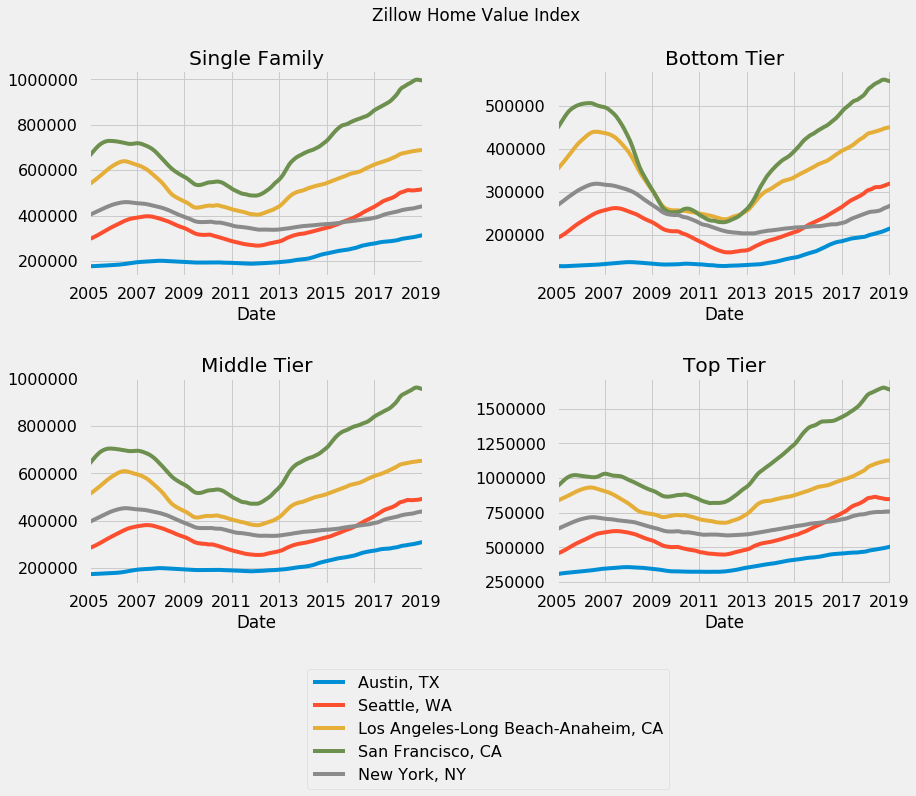

In [131]:
fig, ax = plt.subplots(nrows=2, ncols=2)
top_left = zhv_single_family_data.reset_index().plot(kind='line', x='Date', ax=ax[0,0], title='Single Family', legend=None)
top_right = zhv_bottom_tier_data.reset_index().plot(kind='line', x='Date', title='Bottom Tier', ax=ax[0,1], legend=None)
bottom_left = zhv_middle_tier_data.reset_index().plot(kind='line', x='Date', title='Middle Tier', ax=ax[1,0], legend=None)
bottom_right = zhv_top_tier_data.reset_index().plot(kind='line', x='Date', title='Top Tier', ax=ax[1,1], legend=None)
plt.subplots_adjust(wspace=0.4, hspace=0.5)
fig.suptitle('Zillow Home Value Index')
plt.legend(loc=(-0.75,-1))
plt.show()


In [132]:
zhv_single_family_norm = normalize(zhv_single_family_data)
zhv_bottom_tier_norm = normalize(zhv_bottom_tier_data)
zhv_middle_tier_norm = normalize(zhv_middle_tier_data)
zhv_top_tier_norm = normalize(zhv_top_tier_data)

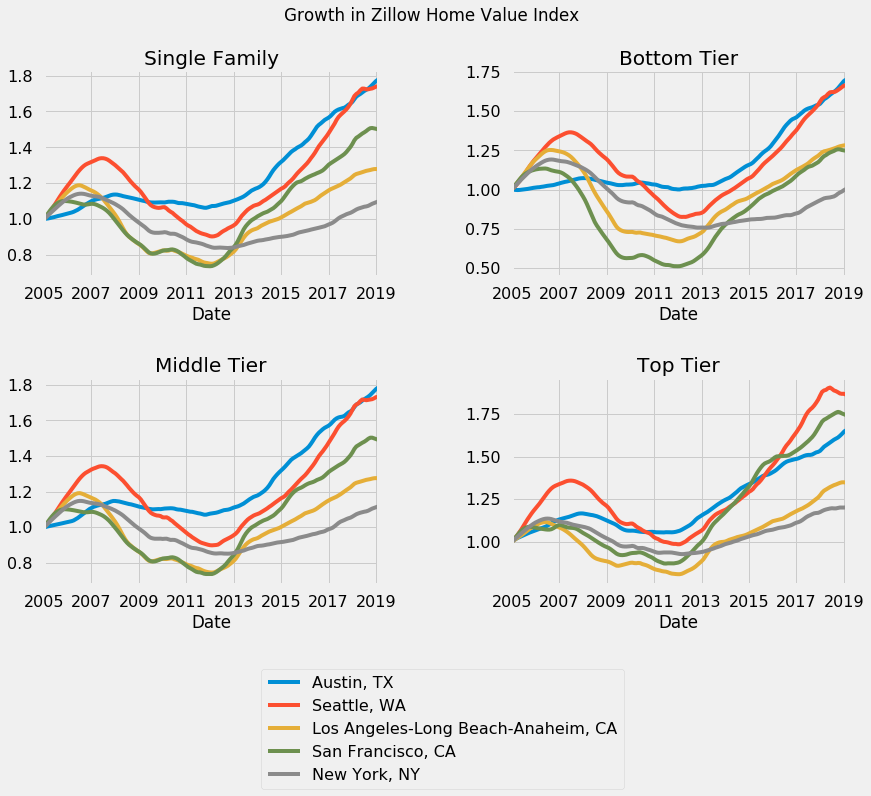

In [133]:
fig, ax = plt.subplots(nrows=2, ncols=2)
top_left = zhv_single_family_norm.reset_index().plot(kind='line', x='Date', ax=ax[0,0], title='Single Family', legend=None)
top_right = zhv_bottom_tier_norm.reset_index().plot(kind='line', x='Date', title='Bottom Tier', ax=ax[0,1], legend=None)
bottom_left = zhv_middle_tier_norm.reset_index().plot(kind='line', x='Date', title='Middle Tier', ax=ax[1,0], legend=None)
bottom_right = zhv_top_tier_norm.reset_index().plot(kind='line', x='Date', title='Top Tier', ax=ax[1,1], legend=None)
plt.subplots_adjust(wspace=0.4, hspace=0.5)
fig.suptitle('Growth in Zillow Home Value Index')
plt.legend(loc=(-0.75,-1))
plt.show()

In [134]:
%%markdown
# Median Rent

# Median Rent


In [135]:
MEDIAN_RENTAL_PRICE_ONE_BED = "MRP1B"
MEDIAN_RENTAL_PRICE_TWO_BED = "MRP2B"
MEDIAN_RENTAL_PRICE_CONDO = "MRPCC"
MEDIAN_RENTAL_PRICE_SINGLE_FAMILY = "MRPSF"

In [136]:
mrp_one_bed_data = compare_areas(metros, 'M', MEDIAN_RENTAL_PRICE_ONE_BED,
                                      kwargs_iterable={'start_date':start_date, 'end_date':end_date})
mrp_two_bed_data = compare_areas(metros, 'M', MEDIAN_RENTAL_PRICE_TWO_BED,
                                      kwargs_iterable={'start_date':start_date, 'end_date':end_date})
mrp_condo_data = compare_areas(metros, 'M', MEDIAN_RENTAL_PRICE_CONDO,
                                      kwargs_iterable={'start_date':start_date, 'end_date':end_date})

# single family rent data for NYC comes up short
metros_except_nyc = metros.copy()
del metros_except_nyc['New York, NY']
mrp_single_family_data = compare_areas(metros_except_nyc, 'M', MEDIAN_RENTAL_PRICE_SINGLE_FAMILY,
                                      kwargs_iterable={'start_date':start_date, 'end_date':end_date})

In [137]:
# first_valid_dates = []
# for df in [mrp_one_bed_data, mrp_two_bed_data, mrp_condo_data, mrp_single_family_data]:
#     for col in df.columns:
#         column_start = df[col].first_valid_index().date()
#         first_valid_dates.append(column_start)
    
# np.array(first_valid_dates)

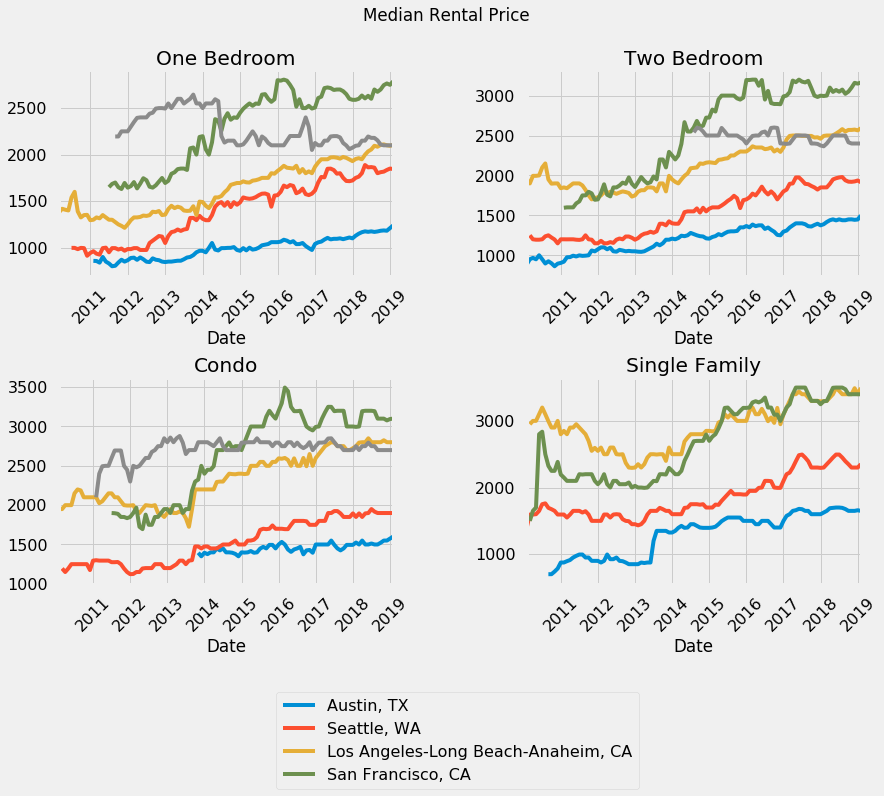

In [138]:
fig, ax = plt.subplots(nrows=2, ncols=2)

top_left = mrp_one_bed_data.reset_index().plot(kind='line', x='Date', ax=ax[0,0], title='One Bedroom', 
                                               legend=None, rot=45)
top_right = mrp_two_bed_data.reset_index().plot(kind='line', x='Date', title='Two Bedroom', ax=ax[0,1], 
                                                legend=None, rot=45)
bottom_left = mrp_condo_data.reset_index().plot(kind='line', x='Date', title='Condo', ax=ax[1,0], 
                                                legend=None, rot=45)
bottom_right = mrp_single_family_data.reset_index().plot(kind='line', x='Date', title='Single Family', 
                                                         ax=ax[1,1], legend=None, rot=45)
plt.subplots_adjust(wspace=0.4, hspace=0.5)
fig.suptitle('Median Rental Price')
plt.legend(loc=(-0.75,-1))
plt.show()

In [139]:
mrp_one_bed_norm = normalize(mrp_one_bed_data) 
mrp_two_bed_norm = normalize(mrp_two_bed_data)
mrp_condo_norm = normalize(mrp_condo_data)
mrp_single_family_norm = normalize(mrp_single_family_data)

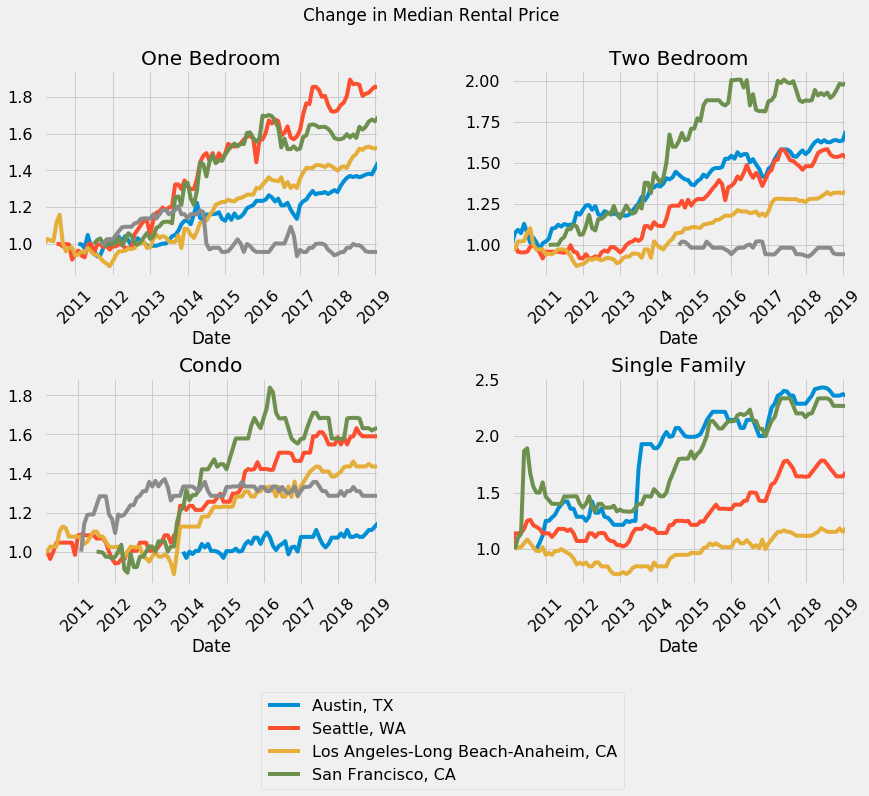

In [140]:
fig, ax = plt.subplots(nrows=2, ncols=2)

top_left = mrp_one_bed_norm.reset_index().plot(kind='line', x='Date', ax=ax[0,0], title='One Bedroom', 
                                               legend=None, rot=45)
top_right = mrp_two_bed_norm.reset_index().plot(kind='line', x='Date', title='Two Bedroom', ax=ax[0,1], 
                                                legend=None, rot=45)
bottom_left = mrp_condo_norm.reset_index().plot(kind='line', x='Date', title='Condo', ax=ax[1,0], 
                                                legend=None, rot=45)
bottom_right = mrp_single_family_norm.reset_index().plot(kind='line', x='Date', title='Single Family', 
                                                         ax=ax[1,1], legend=None, rot=45)
plt.subplots_adjust(wspace=0.4, hspace=0.5)
fig.suptitle('Change in Median Rental Price')
plt.legend(loc=(-0.75,-1))
plt.show()